In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

np.random.seed(123)


In [4]:
N=10000
s=1


In [5]:
x= np.zeros(N)
x[0]=0

In [9]:
for i in range(1, N):
    x_str = np.random.normal(loc=x[i-1], scale=s)
    rfunction = ((1/2)*np.exp(-abs(x_str)))/((1/2)*np.exp(-abs(x[i-1])))
    u = np.random.uniform(0, 1)
    if u < rfunction:
        x[i] = x_str
    else:
        x[i] = x[i-1]

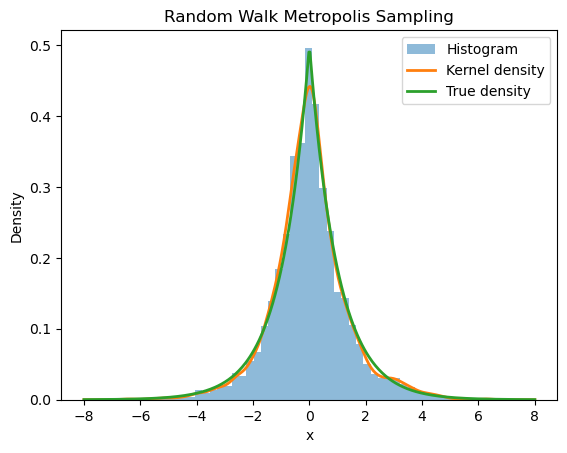

Sample mean: 0.002365469143383335
Sample standard deviation: 1.335543836535055


In [10]:
x_grid = np.linspace(-8, 8, 400)
true_density = 0.5 * np.exp(-np.abs(x_grid))

plt.hist(x, bins=50, density=True, alpha=0.5, label="Histogram")
kde = gaussian_kde(x)
plt.plot(x_grid, kde(x_grid), label="Kernel density", linewidth=2)
plt.plot(x_grid, true_density, label="True density", linewidth=2)
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Random Walk Metropolis Sampling")
plt.legend()
plt.show()

# Monte Carlo estimates
print("Sample mean:", np.mean(x))
print("Sample standard deviation:", np.std(x, ddof=1))